In [ ]:
import numpy as np
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import pandas as pd

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')  # Mount Google Drive

import os

main_folder = "/content/drive/My Drive/drawings"  # Update with your actual folder name
subfolders = os.listdir(main_folder)

print("Subfolders:", subfolders)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Subfolders: ['spiral', 'wave']


In [ ]:
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):  # Check if it's a folder
        print(f"Files in {subfolder}: {os.listdir(subfolder_path)}")


Files in spiral: ['testing', 'training']
Files in wave: ['testing', 'training']


In [ ]:
import cv2
import matplotlib.pyplot as plt

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)

    for file in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file)

        if file.endswith((".jpg", ".png")):  # Check if it's an image
            image = cv2.imread(file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

            plt.imshow(image)
            plt.title(f"Image: {file} from {subfolder}")
            plt.axis("off")
            plt.show()


In [ ]:
import tensorflow as tf

dataset_path = "/content/drive/My Drive/drawings"  # Update the path
img_size = (128, 128)  # Resize images to 128x128
batch_size = 32

# Load dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size
)

# Check class names
class_names = train_dataset.class_names
print("Classes:", class_names)


Found 204 files belonging to 2 classes.
Classes: ['spiral', 'wave']


In [ ]:
import os
import cv2
import numpy as np

# Path to your test dataset folder
test_folder = "/content/drive/My Drive/drawings/spiral/testing"

x_test = []
y_test = []

# Iterate through folders (classes)
for label, class_folder in enumerate(sorted(os.listdir(test_folder))):
    class_path = os.path.join(test_folder, class_folder)

    # Read images from class folder
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Read image using OpenCV
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Resize for consistency
        x_test.append(img)
        y_test.append(label)  # Label is based on folder index

# Convert lists to NumPy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Print shapes
print("x_test shape:", x_test.shape)  # (num_samples, 128, 128, 3)
print("y_test shape:", y_test.shape)  # (num_samples,)


x_test shape: (30, 128, 128, 3)
y_test shape: (30,)


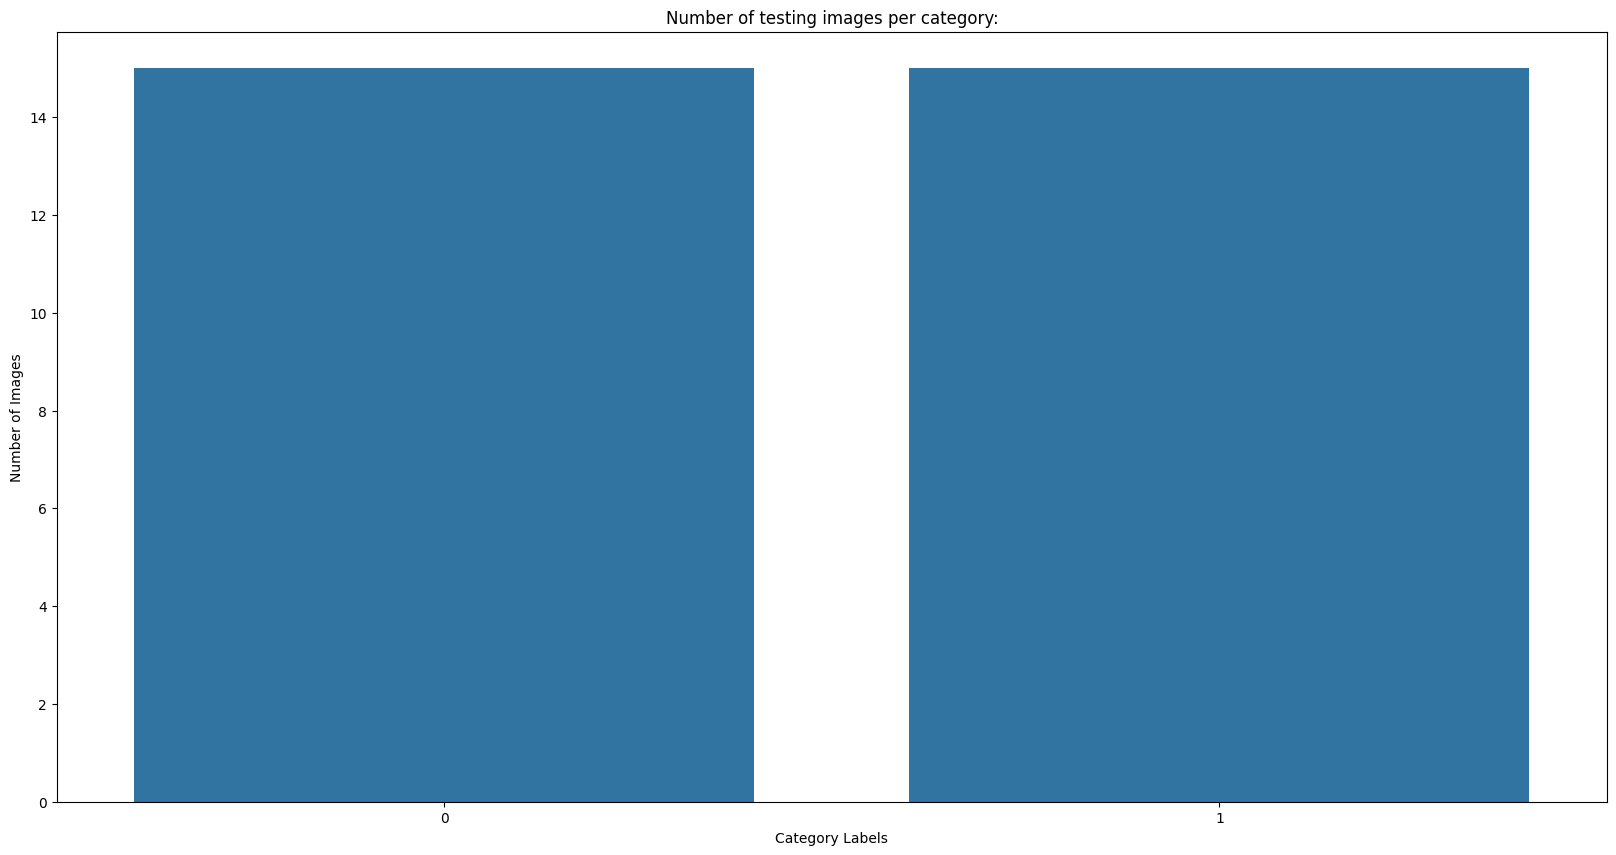

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Count unique labels
unique_test, count_test = np.unique(y_test, return_counts=True)

# Plot using correct syntax
plt.figure(figsize=(20, 10))
sns.barplot(x=unique_test, y=count_test).set_title("Number of testing images per category:")
plt.xlabel("Category Labels")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
import os
import cv2
import numpy as np

# Path to your training dataset folder
train_folder = "/content/drive/My Drive/drawings/spiral/training"  # Update path

x_train = []
y_train = []

# Iterate through folders (classes)
for label, class_folder in enumerate(sorted(os.listdir(train_folder))):
    class_path = os.path.join(train_folder, class_folder)

    # Read images from class folder
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Read image using OpenCV
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Resize for consistency
        x_train.append(img)
        y_train.append(label)  # Label is based on folder index

# Convert lists to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Print shapes
print("x_train shape:", x_train.shape)  # (num_samples, 128, 128, 3)
print("y_train shape:", y_train.shape)  # (num_samples,)


x_train shape: (72, 128, 128, 3)
y_train shape: (72,)


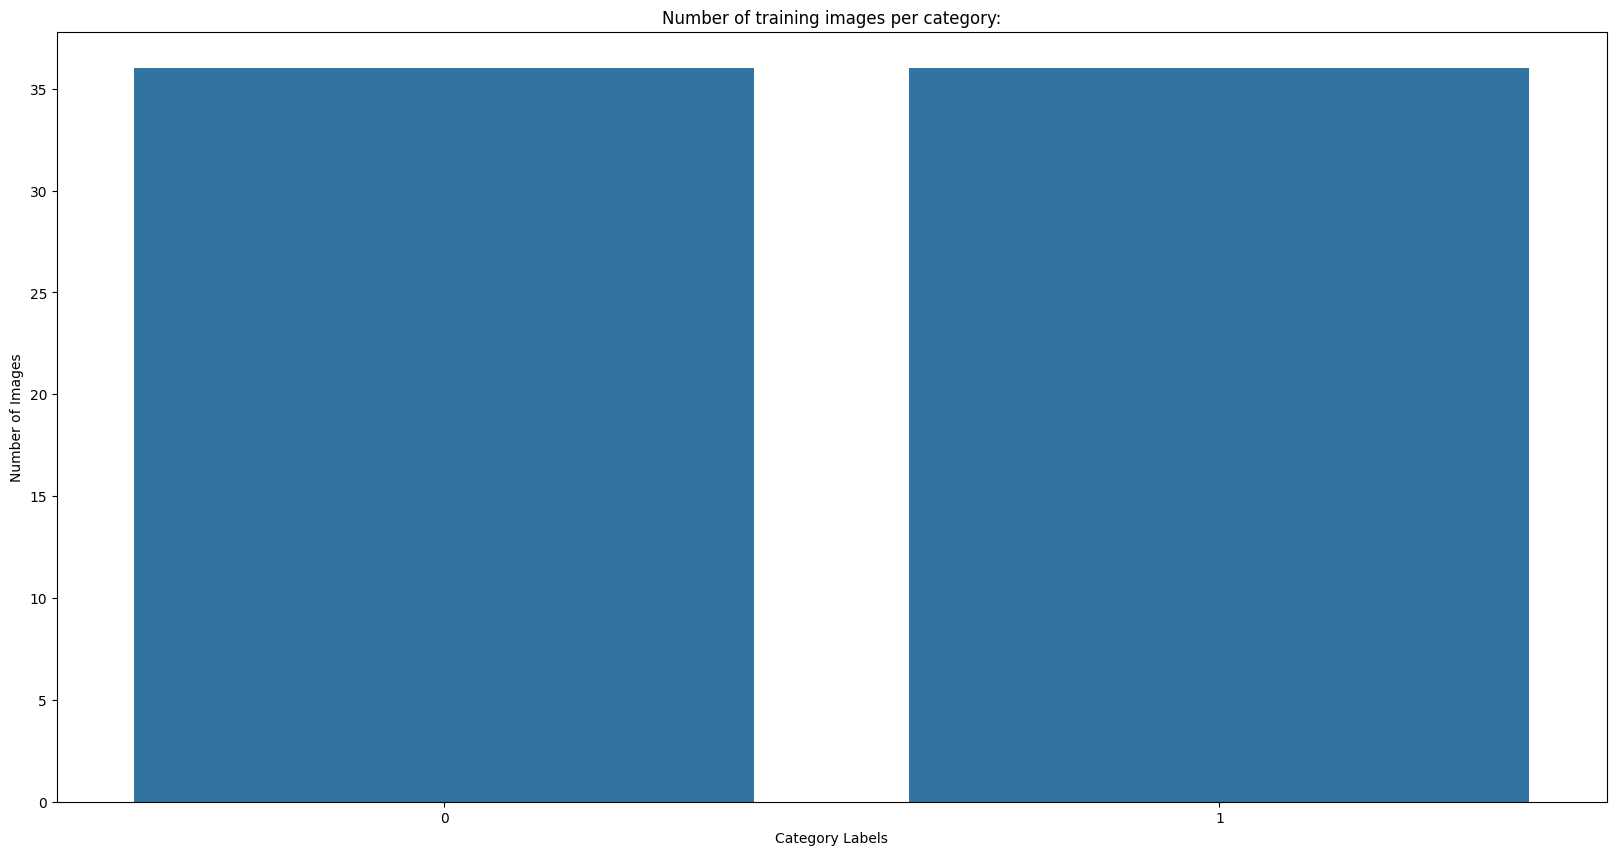

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Count unique labels in training set
unique_train, count_train = np.unique(y_train, return_counts=True)

# Plot training dataset distribution
plt.figure(figsize=(20, 10))
sns.barplot(x=unique_train, y=count_train).set_title("Number of training images per category:")
plt.xlabel("Category Labels")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
train_data_generator = ImageDataGenerator(rotation_range=360,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
#                                     brightness_range=[0.5, 1.5],
                                    horizontal_flip=True,
                                    vertical_flip=True)

x = list(x_train)
y = list(y_train)

x_aug_train = []
y_aug_train = []

for (i, v) in enumerate(y):
    x_img = x[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = train_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(70):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_train.append(aug_image)
        y_aug_train.append(v)
print(len(x_aug_train))
print(len(y_aug_train))

x_train = x + x_aug_train
y_train = y + y_aug_train
print(len(x_train))
print(len(y_train))

test_data_generator = ImageDataGenerator(rotation_range=360,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
#                                     brightness_range=[0.5, 1.5],
                                    horizontal_flip=True,
                                    vertical_flip=True)

x = list(x_test)
y = list(y_test)

x_aug_test = []
y_aug_test = []

for (i, v) in enumerate(y):
    x_img = x[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = test_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(20):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_test.append(aug_image)
        y_aug_test.append(v)
print(len(x_aug_test))
print(len(y_aug_test))

x_test = x + x_aug_test
y_test = y + y_aug_test
print(len(x_test))
print(len(y_test))

5040
5040
5112
5112
600
600
630
630


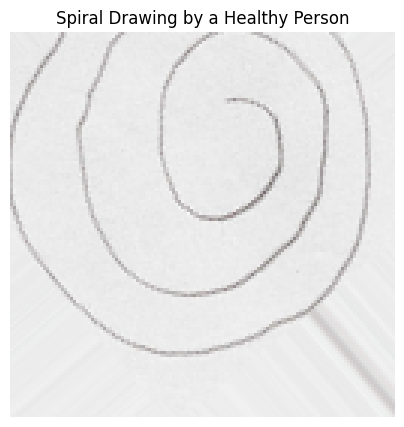

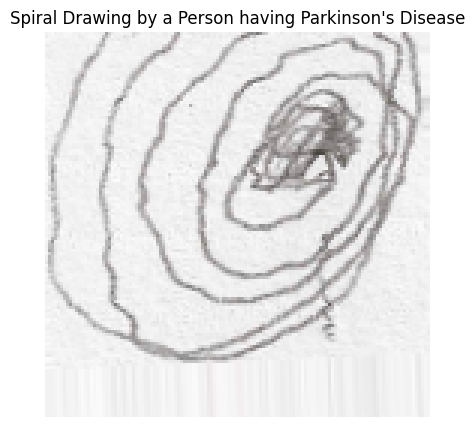

In [ ]:
import matplotlib.pyplot as plt

# Define class names (update based on your actual folder names)
class_names = ["healthy", "parkinson"]

# Convert integer labels to class names
y_train_labels = [class_names[label] for label in y_train]

# Plot healthy image
figure1 = plt.figure(figsize=(5, 5))
idx_healthy = [i for (i, v) in enumerate(y_train_labels) if v == "healthy"]
if idx_healthy:  # Check if healthy images exist
    img_healthy = x_train[idx_healthy[-1]]
    plt.imshow(img_healthy)
    plt.title("Spiral Drawing by a Healthy Person")
    plt.axis("off")
    plt.show()
else:
    print("No healthy images found in training data.")

# Plot Parkinson's image
figure2 = plt.figure(figsize=(5, 5))
idx_parkinson = [i for (i, v) in enumerate(y_train_labels) if v == "parkinson"]
if idx_parkinson:  # Check if Parkinson images exist
    img_parkinson = x_train[idx_parkinson[-1]]
    plt.imshow(img_parkinson)
    plt.title("Spiral Drawing by a Person having Parkinson's Disease")
    plt.axis("off")
    plt.show()
else:
    print("No Parkinson images found in training data.")


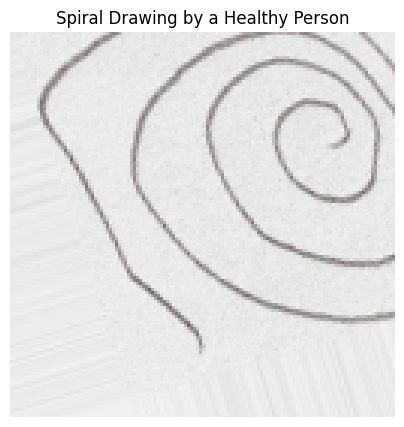

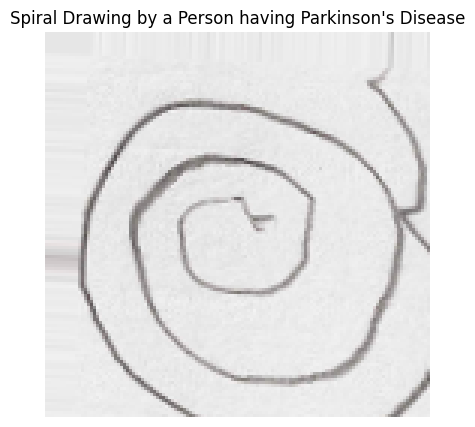

In [ ]:
import matplotlib.pyplot as plt

# Define class names (update based on your dataset)
class_names = ["healthy", "parkinson"]

# Convert integer labels to class names
y_test_labels = [class_names[label] for label in y_test]

# Plot healthy image
figure1 = plt.figure(figsize=(5, 5))
idx_healthy = [i for (i, v) in enumerate(y_test_labels) if v == "healthy"]
if idx_healthy:  # Check if healthy images exist
    img_healthy = x_test[idx_healthy[-1]]
    plt.imshow(img_healthy)
    plt.title("Spiral Drawing by a Healthy Person")
    plt.axis("off")
    plt.show()
else:
    print("No healthy images found in test data.")

# Plot Parkinson's image
figure2 = plt.figure(figsize=(5, 5))
idx_parkinson = [i for (i, v) in enumerate(y_test_labels) if v == "parkinson"]
if idx_parkinson:  # Check if Parkinson images exist
    img_parkinson = x_test[idx_parkinson[-1]]
    plt.imshow(img_parkinson)
    plt.title("Spiral Drawing by a Person having Parkinson's Disease")
    plt.axis("off")
    plt.show()
else:
    print("No Parkinson images found in test data.")


In [ ]:
for i in range(len(x_train)):
    img = x_train[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_train[i] = img

for i in range(len(x_test)):
    img = x_test[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_test[i] = img

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train/255.0
x_test = x_test/255.0

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(y_train.shape)

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
print(y_test.shape)

(5112,)
(630,)


In [ ]:
print("Number of training images:", len(x_train))
print("Number of testing images:", len(x_test))


Number of training images: 5112
Number of testing images: 630


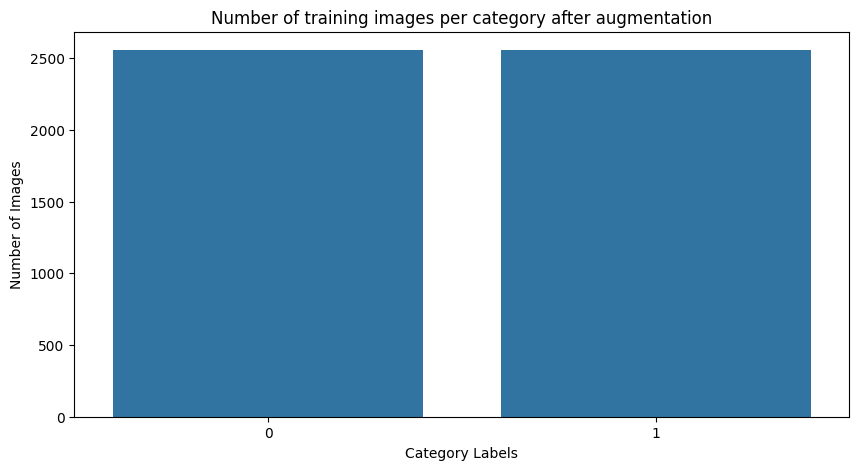

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Count unique labels in training set
unique_train, count_train = np.unique(y_train, return_counts=True)

# Plot using correct syntax
plt.figure(figsize=(10, 5))  # Adjust size if needed
sns.barplot(x=unique_train, y=count_train).set_title("Number of training images per category after augmentation")
plt.xlabel("Category Labels")
plt.ylabel("Number of Images")
plt.show()


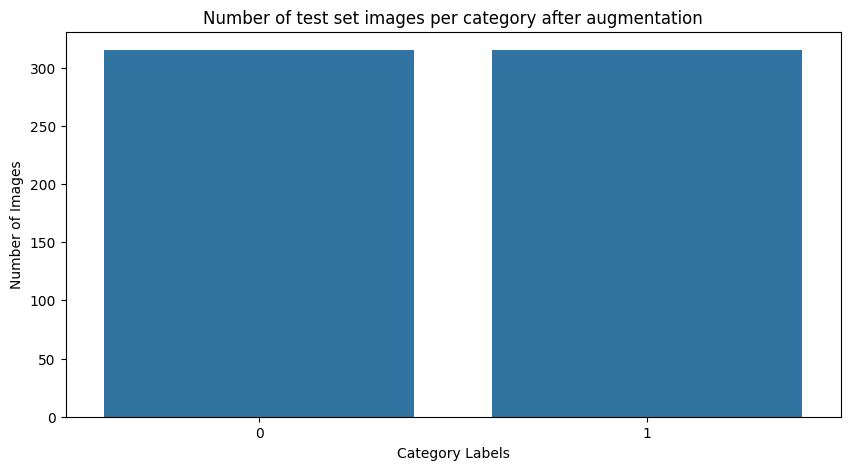

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Count unique labels in test set
unique_test, count_test = np.unique(y_test, return_counts=True)

# Plot using correct syntax
plt.figure(figsize=(10, 5))  # Adjust size if needed
sns.barplot(x=unique_test, y=count_test).set_title("Number of test set images per category after augmentation")
plt.xlabel("Category Labels")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5112, 128, 128, 1)
(5112, 2)
(630, 128, 128, 1)
(630, 2)


In [ ]:
def parkinson_disease_detection_model(input_shape=(128, 128, 1)):
    regularizer = tf.keras.regularizers.l2(0.001)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu',
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu',
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))

    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu',
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu',
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform', name='fc3'))

    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model= parkinson_disease_detection_model(input_shape=(128, 128, 1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 128, 128, 128)       │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 40, 40, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 12, 12, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv4 (Conv2D)                       │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc3 (Dense)                          │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,146 (930.26 KB)

 Trainable params: 238,146 (930.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.6852 - loss: 0.6933 - val_accuracy: 0.7651 - val_loss: 0.6721
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7111 - loss: 0.6785 - val_accuracy: 0.6730 - val_loss: 0.6752
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6923 - loss: 0.6751 - val_accuracy: 0.6683 - val_loss: 0.6734
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7026 - loss: 0.6703 - val_accuracy: 0.7365 - val_loss: 0.6457
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.7164 - loss: 0.6596 - val_accuracy: 0.7778 - val_loss: 0.6221
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7293 - loss: 0.6435 - val_accuracy: 0.7730 - val_loss: 0.6156
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7311 - loss: 0.6385 - val_accuracy: 0.7683 - val_loss: 0.6072
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7347 - loss: 0.6278 - val_accuracy: 0.

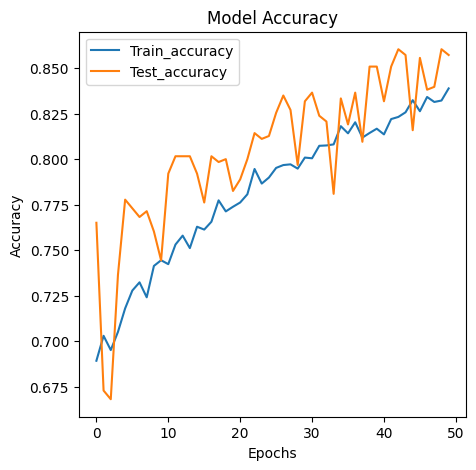

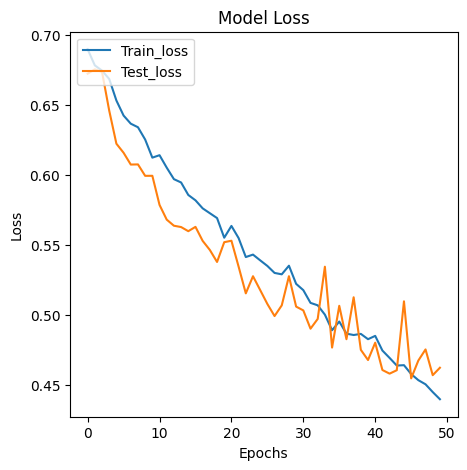

In [ ]:
figure = plt.figure(figsize=(5, 5))
plt.plot(hist.history['accuracy'], label='Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(5, 5))
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [ ]:
ypred = model.predict(x_test)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
print(classification_report(y_test_pred, ypred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       315
           1       0.83      0.90      0.86       315

    accuracy                           0.86       630
   macro avg       0.86      0.86      0.86       630
weighted avg       0.86      0.86      0.86       630



<Axes: >

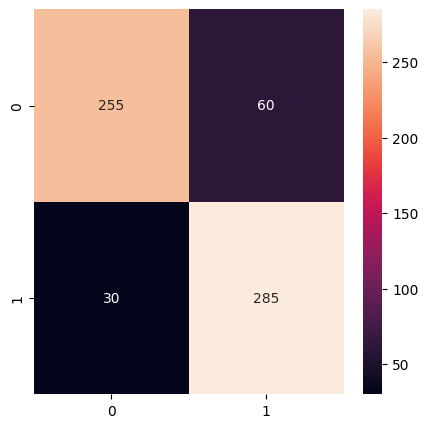

In [ ]:
matrix = confusion_matrix(y_test_pred, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
model.save('parkinson_disease_detection.h5')

In [ ]:
import cv2
import numpy as np

# Labels
labels = ['Healthy', 'Parkinson']

# Load Images
image_healthy = cv2.imread('/content/drive/My Drive/drawings/spiral/testing/healthy/V55HE15.png', cv2.IMREAD_GRAYSCALE)
image_parkinson = cv2.imread('/content/drive/My Drive/drawings/spiral/testing/parkinson/V15PE01.png', cv2.IMREAD_GRAYSCALE)

# Resize Images
image_healthy = cv2.resize(image_healthy, (128, 128))
image_parkinson = cv2.resize(image_parkinson, (128, 128))

# Normalize (convert to float & scale 0-1)
image_healthy = image_healthy / 255.0
image_parkinson = image_parkinson / 255.0

# Expand dimensions to match model input shape (batch_size, height, width, channels)
image_healthy = np.expand_dims(image_healthy, axis=0)  # Batch size
image_healthy = np.expand_dims(image_healthy, axis=-1)  # Channel size (1 for grayscale)

image_parkinson = np.expand_dims(image_parkinson, axis=0)
image_parkinson = np.expand_dims(image_parkinson, axis=-1)

# If model expects 3 channels (RGB format), convert grayscale to 3-channel
image_healthy = np.stack([image_healthy] * 3, axis=-1)
image_parkinson = np.stack([image_parkinson] * 3, axis=-1)

# Print Shapes
print("Healthy Image Shape:", image_healthy.shape)  # Expected (1, 128, 128, 3)
print("Parkinson Image Shape:", image_parkinson.shape)  # Expected (1, 128, 128, 3)


Healthy Image Shape: (1, 128, 128, 1, 3)
Parkinson Image Shape: (1, 128, 128, 1, 3)


In [ ]:
ypred_healthy = model.predict(image_healthy)
ypred_parkinson = model.predict(image_parkinson)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None